<a href="https://colab.research.google.com/github/Sanjeev2004/YouTube_ChatBot/blob/main/Digit_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#EDA
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [5]:
unique_classes = np.unique(y_train)
print("Unique classes in the dataset:", unique_classes)
print("Number of unique classes:", len(unique_classes))

Unique classes in the dataset: [0 1 2 3 4 5 6 7 8 9]
Number of unique classes: 10


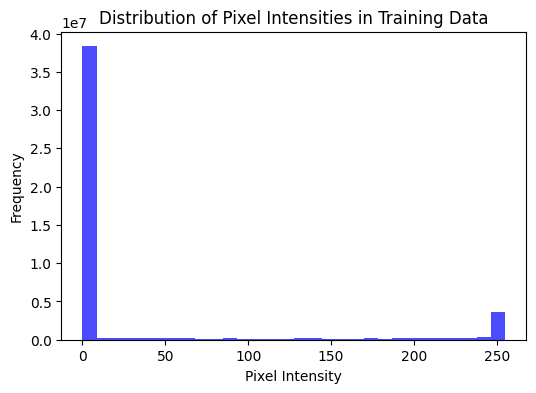

In [6]:
#pixel intensity
plt.figure(figsize=(6, 4))
plt.hist(X_train.reshape(-1), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Pixel Intensities in Training Data')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

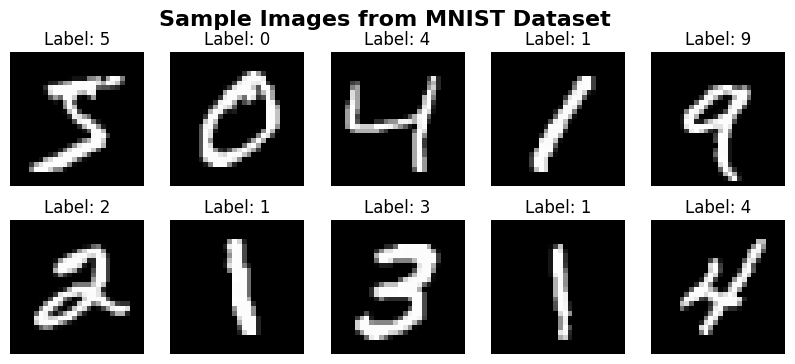

In [7]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.show()

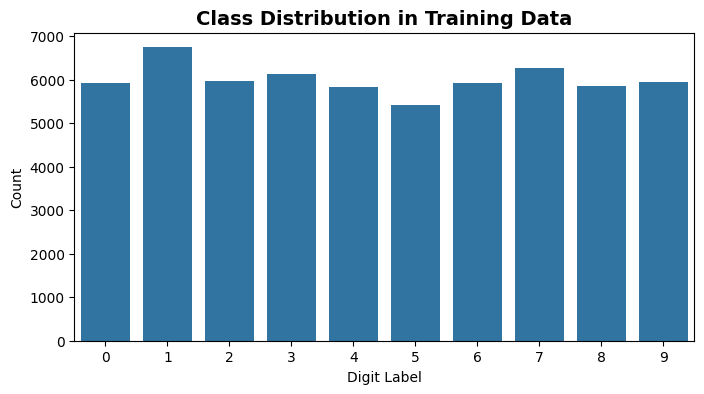

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

In [9]:
#Data Processing
#1.NOrmalise pixel values
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

print("After Normalisation")
print("Training data min:", X_train.min(), "max:",X_train.max())
print("Testing data min:", X_test.min(), "max:",X_test.max())

After Normalisation
Training data min: 0.0 max: 1.0
Testing data min: 0.0 max: 1.0


In [10]:
#reshape images
# X_train=np.expand_dims(X_train,axis=-1)
# X_test=np.expand_dims(X_test,-1)
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [11]:
model=Sequential([
    # First Conv + Pool block
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    #Second Conv + Pool block
    Conv2D(64, kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    #Fully Connected Layers
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,242 (1.65 MB)

 Trainable params: 431,242 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
#Train the model
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8635 - loss: 0.4238 - val_accuracy: 0.9863 - val_loss: 0.0424
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0795 - val_accuracy: 0.9899 - val_loss: 0.0329
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9800 - loss: 0.0622 - val_accuracy: 0.9889 - val_loss: 0.0352
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0540 - val_accuracy: 0.9905 - val_loss: 0.0272
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9864 - loss: 0.0433 - val_accuracy: 0.9922 - val_loss: 0.0235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0412 - val_accuracy: 0.9908 - val_loss: 0.0254
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9888 - loss: 0.0371 - val_accuracy: 0.9936 - val_loss: 0.0209
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9891 - loss: 0.0343 -

In [16]:
print("History keys:", history.history.keys())

History keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

In [18]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.024719474837183952
Test Accuracy: 0.9927999973297119


In [20]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


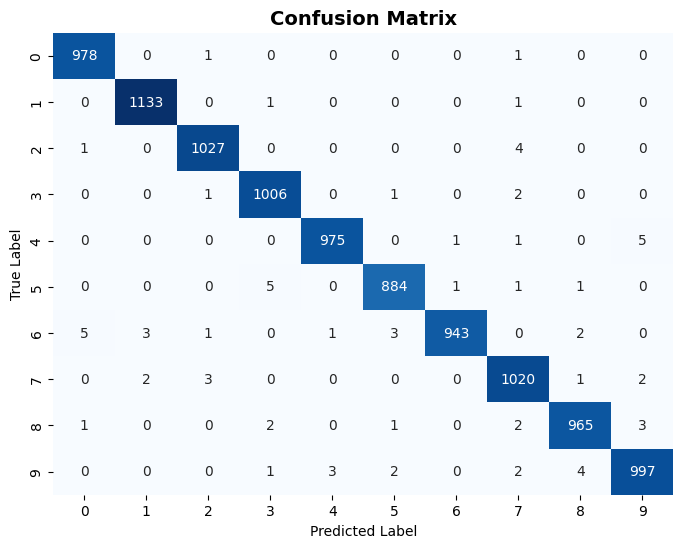

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False) # Changed 'colors' to 'Blues'
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
#classification report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



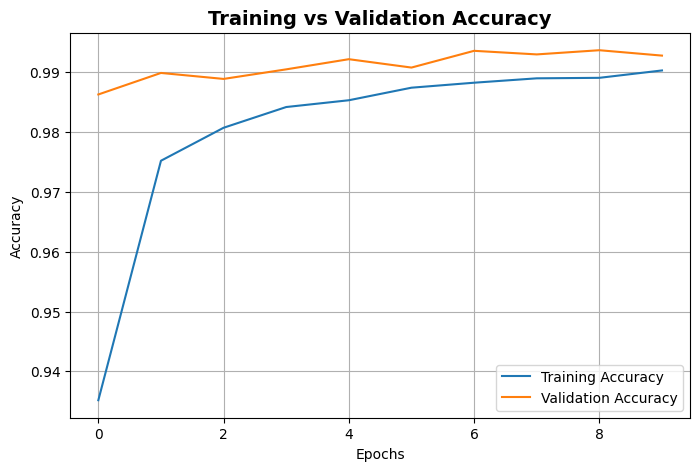

In [24]:
# Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


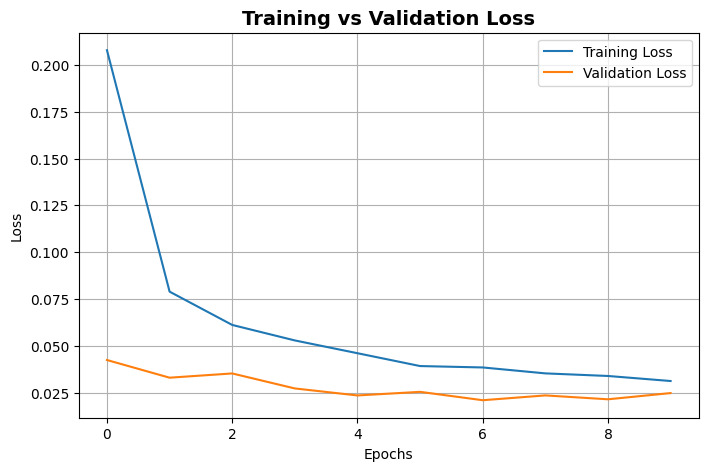

In [25]:
# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

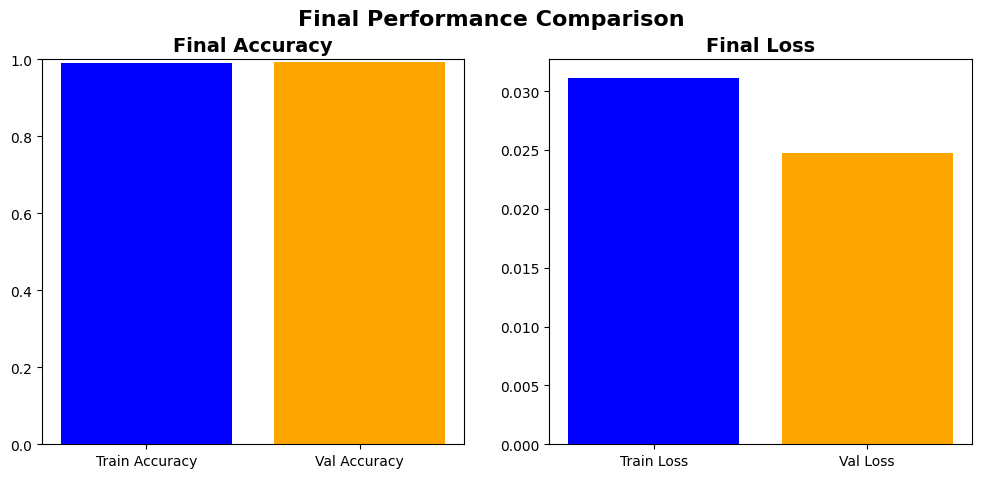

In [27]:
# Extract final accuracy and loss values
final_acc = [history.history['accuracy'][-1], history.history['val_accuracy'][-1]]
final_loss = [history.history['loss'][-1], history.history['val_loss'][-1]]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Define colors for the bars
colors = ['blue', 'orange'] # Example colors

# Accuracy Bar Plot
ax[0].bar(['Train Accuracy', 'Val Accuracy'], final_acc, color=colors)
ax[0].set_title("Final Accuracy", fontsize=14, fontweight="bold")
ax[0].set_ylim(0, 1)

# Loss Bar Plot
ax[1].bar(['Train Loss', 'Val Loss'], final_loss, color=colors)
ax[1].set_title("Final Loss", fontsize=14, fontweight="bold")

plt.suptitle("Final Performance Comparison", fontsize=16, fontweight="bold")
plt.show()

Total Correctly Classified Images: 9928


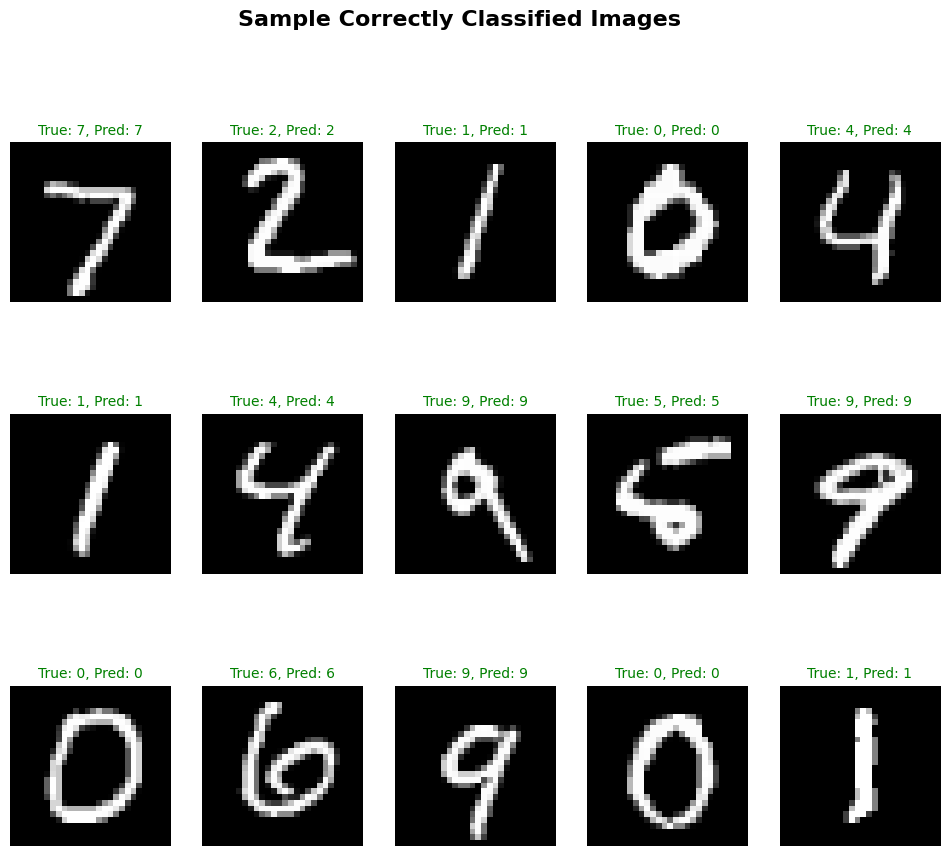

In [29]:
# Find correctly classified examples
correct_idx = np.where(y_pred == y_test)[0]

print(f"Total Correctly Classified Images: {len(correct_idx)}")

# Show first 15 correctly classified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(correct_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10, color='green')
    plt.axis('off')
plt.suptitle("Sample Correctly Classified Images", fontsize=16, fontweight="bold")
plt.show()

Total Misclassified Images: 72


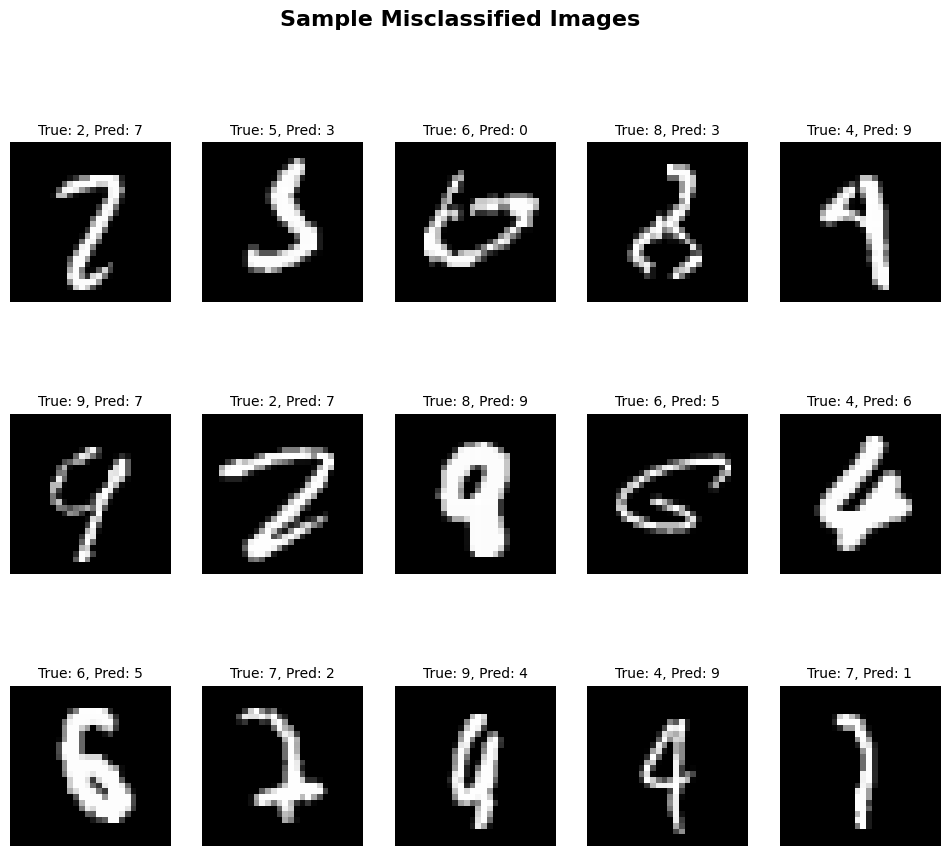

In [30]:
# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total Misclassified Images: {len(misclassified_idx)}")

# Show first 15 misclassified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Sample Misclassified Images", fontsize=16, fontweight="bold")
plt.show()

In [31]:
#save the model
model.save("mnist_cnn_model.h5")